<a href="https://colab.research.google.com/github/DevaAnanda/Bengkel-Koding/blob/main/Update_CapstonProject_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [62]:
df = pd.read_csv('ObesityDataSet.csv')

In [63]:
print(df.head())

  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_W

In [64]:
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC',
                    'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

In [65]:
# Ganti '?' dengan NaN
df_eda = df.copy()
df_eda.replace('?', np.nan, inplace=True)

In [66]:
# Konversi numerik (belum distandardkan!)
for col in numerical_cols:
    df_eda[col] = pd.to_numeric(df_eda[col], errors='coerce').round(2)

In [67]:
print(df_eda.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-null   object 
 12  FAF                             20

In [68]:
print(df_eda.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2089.000000  2089.000000  2092.000000  2093.000000  2089.000000   
mean     24.717894     1.706573    88.608169     2.443469     2.729445   
std       8.391368     0.117753    36.154653     0.642897     0.981183   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.960000     1.630000    66.000000     2.000000     2.680000   
50%      22.810000     1.700000    83.000000     2.400000     3.000000   
75%      26.000000     1.770000   108.052500     3.000000     3.000000   
max     106.440000     2.850000   441.130000     8.710000    12.300000   

              CH2O          FAF          TUE  
count  2096.000000  2092.000000  2096.000000  
mean      2.030601     1.073446     0.680162  
std       0.737906     1.149335     0.717202  
min       1.000000     0.000000     0.000000  
25%       1.570000     0.130000     0.000000  
50%       2.000000     1.000000     0.630000  
75% 

In [69]:
print("\nMissing Values:\n", df_eda.isnull().sum())
print("\nUnique Values:\n", df_eda.nunique())
print("\nDuplicates:", df_eda.duplicated().sum())


Missing Values:
 Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64

Unique Values:
 Age                                927
Gender                               2
Height                              61
Weight                            1333
CALC                                 4
FAVC                                 2
FCVC                               188
NCP                                265
SCC        

<ipython-input-70-f990e5f2a536>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='NObeyesdad', data=df_eda, order=df_eda['NObeyesdad'].value_counts().index, palette='Set2')


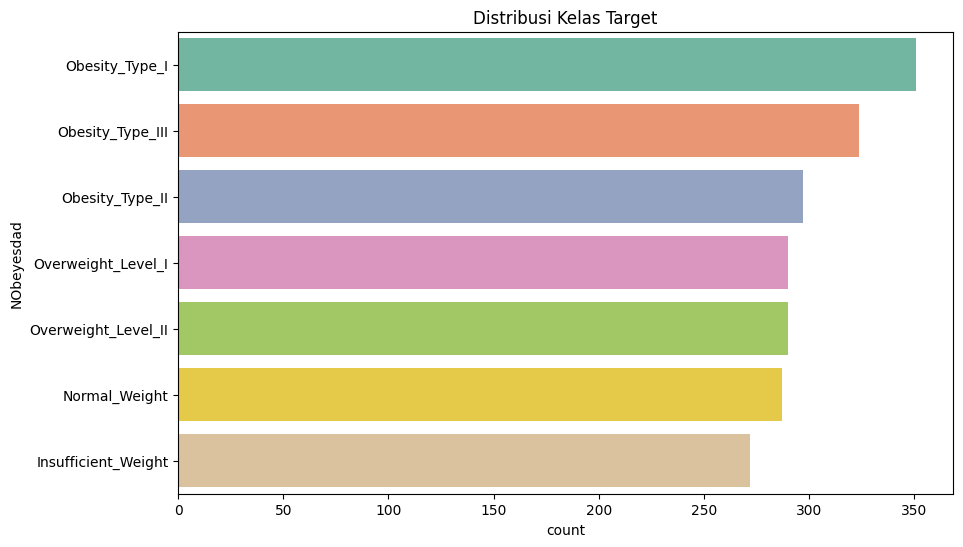

In [70]:
# Visualisasi distribusi target
plt.figure(figsize=(10, 6))
sns.countplot(y='NObeyesdad', data=df_eda, order=df_eda['NObeyesdad'].value_counts().index, palette='Set2')
plt.title('Distribusi Kelas Target')
plt.show()

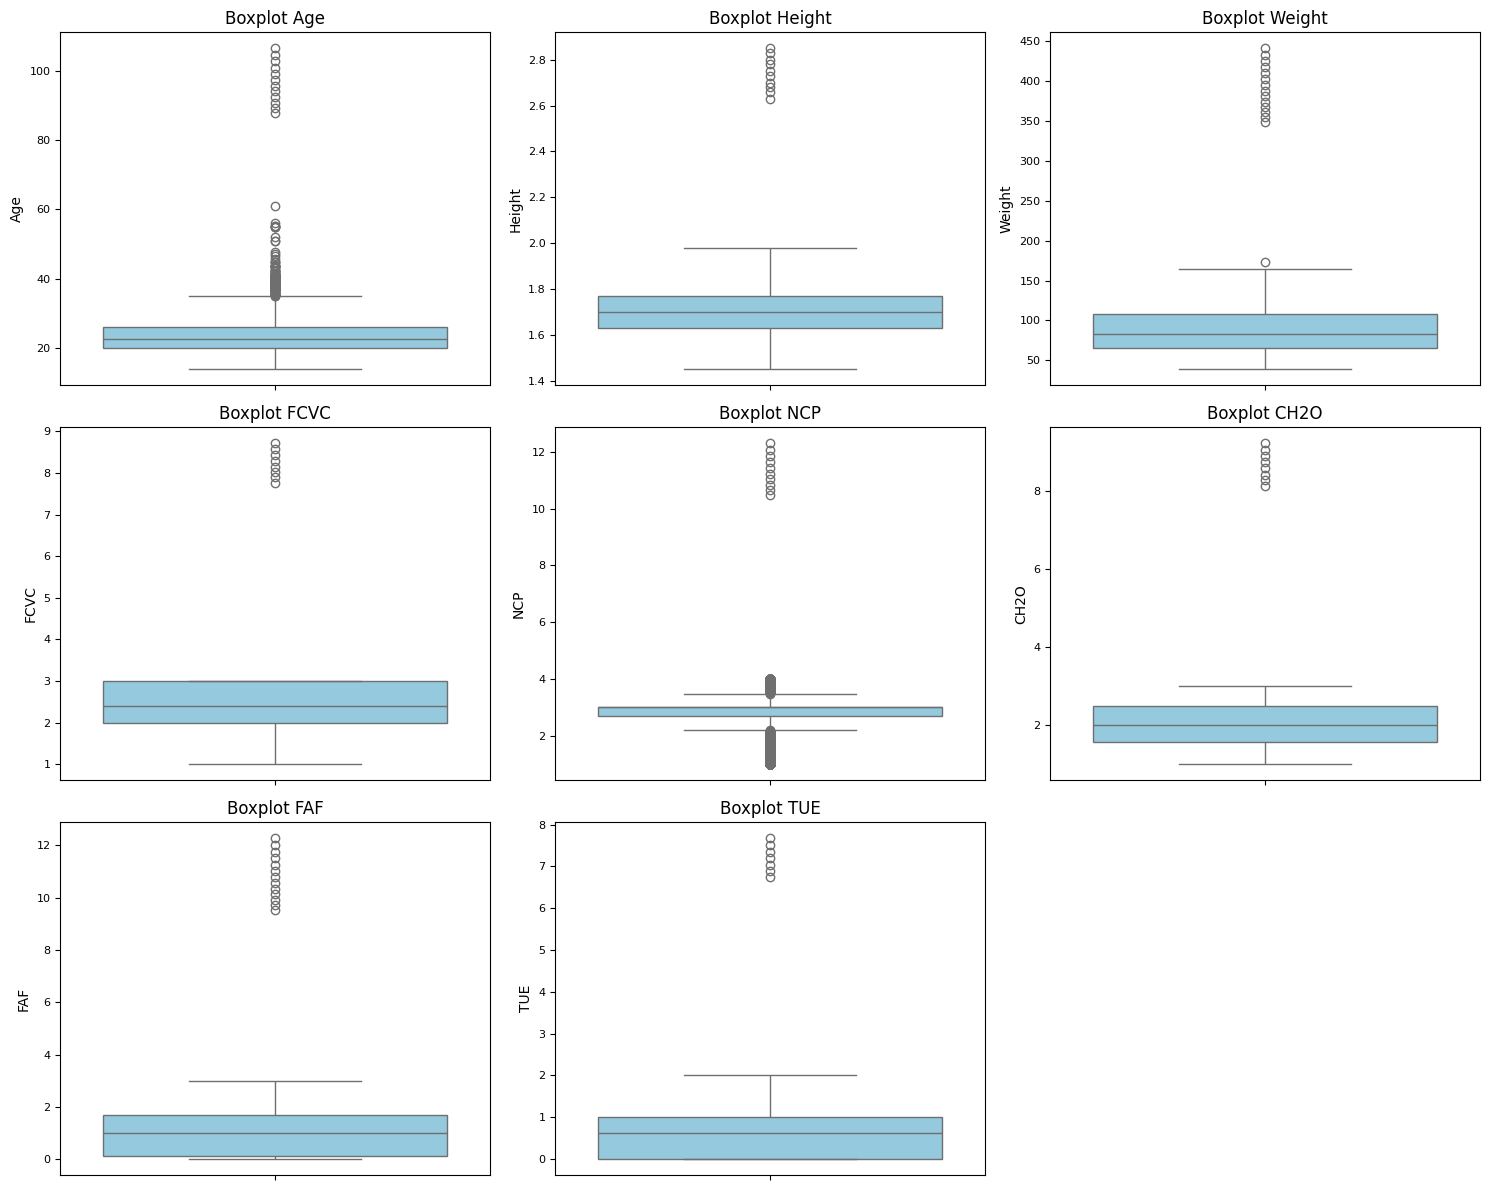

In [71]:
# Boxplot numerik (belum scaling)
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_eda[col], color='skyblue')
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)
    plt.tick_params(axis='y', labelsize=8)
plt.tight_layout()
plt.show()

Kesimpulan EDA:
- Tidak ada missing values yang diakui, tapi ada '?' sebagai missing marker.
- Terdapat imbalance class pada target.
- Ada kemungkinan outlier pada fitur numerik.

# -----------------------------------------------------
# 4️⃣ Data Cleaning & Preprocessing
# -----------------------------------------------------

In [72]:
# Ganti '?' dengan NaN
df.replace('?', np.nan, inplace=True)

In [73]:
# Konversi kolom numerik
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [74]:
# Isi missing values
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df[categorical_cols] = df[categorical_cols].astype(str).fillna('Missing')

In [75]:
# Hapus duplikat
df.drop_duplicates(inplace=True)

Kesimpulan Preprocessing:
- Missing values sudah ditangani.
- Data duplikat sudah dihapus.
- Data siap digunakan untuk modeling.



# -----------------------------------------------------
# 5️⃣ Split Data
# -----------------------------------------------------

In [76]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [77]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# -----------------------------------------------------
# 6️⃣ Pipeline Modeling
# -----------------------------------------------------

In [78]:
# OneHotEncoder untuk kategori, StandardScaler untuk numerik
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

In [81]:
# Pipelines with SMOTE
rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

knn_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

svm_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(random_state=42))
])

# -----------------------------------------------------
# 7️⃣ Training & Evaluation
# -----------------------------------------------------


🔎 Model: RandomForest
Akurasi: 0.9379
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.81      0.96      0.88        57
     Obesity_Type_I       0.96      0.93      0.94        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.89      0.87      0.88        55
Overweight_Level_II       0.93      0.90      0.91        58

           accuracy                           0.94       419
          macro avg       0.94      0.94      0.94       419
       weighted avg       0.94      0.94      0.94       419



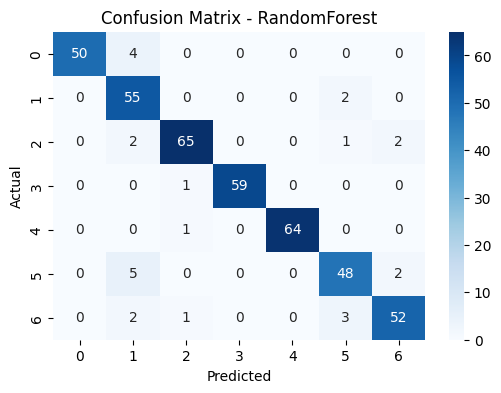


🔎 Model: KNN
Akurasi: 0.7995
                     precision    recall  f1-score   support

Insufficient_Weight       0.78      0.91      0.84        54
      Normal_Weight       0.68      0.47      0.56        57
     Obesity_Type_I       0.78      0.86      0.82        70
    Obesity_Type_II       0.80      0.93      0.86        60
   Obesity_Type_III       0.96      1.00      0.98        65
 Overweight_Level_I       0.77      0.65      0.71        55
Overweight_Level_II       0.78      0.72      0.75        58

           accuracy                           0.80       419
          macro avg       0.79      0.79      0.79       419
       weighted avg       0.79      0.80      0.79       419



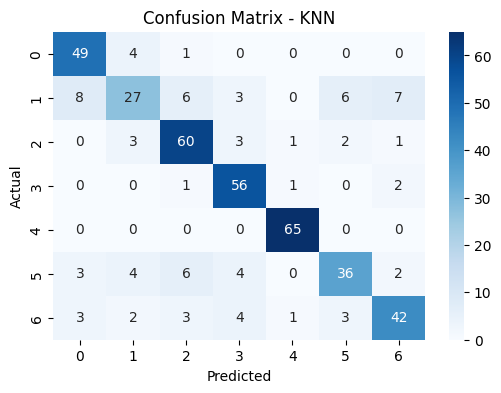


🔎 Model: SVM
Akurasi: 0.8807
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.94      0.94        54
      Normal_Weight       0.77      0.75      0.76        57
     Obesity_Type_I       0.95      0.90      0.93        70
    Obesity_Type_II       0.92      0.98      0.95        60
   Obesity_Type_III       1.00      0.97      0.98        65
 Overweight_Level_I       0.71      0.82      0.76        55
Overweight_Level_II       0.85      0.78      0.81        58

           accuracy                           0.88       419
          macro avg       0.88      0.88      0.88       419
       weighted avg       0.88      0.88      0.88       419



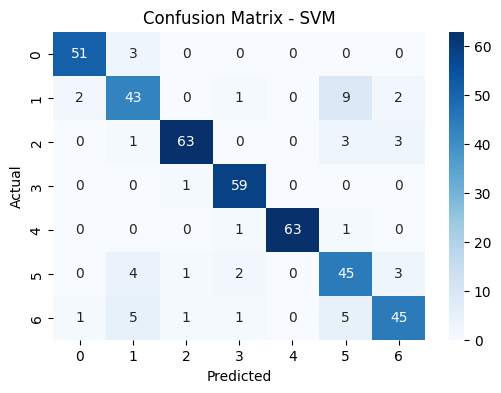

In [82]:
pipelines = {
    'RandomForest': rf_pipeline,
    'KNN': knn_pipeline,
    'SVM': svm_pipeline
}

results = {}
for name, pipe in pipelines.items():
    print(f'\n🔎 Model: {name}')
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'Akurasi: {acc:.4f}')
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    results[name] = acc

<ipython-input-83-12c2c106e756>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='Set2')


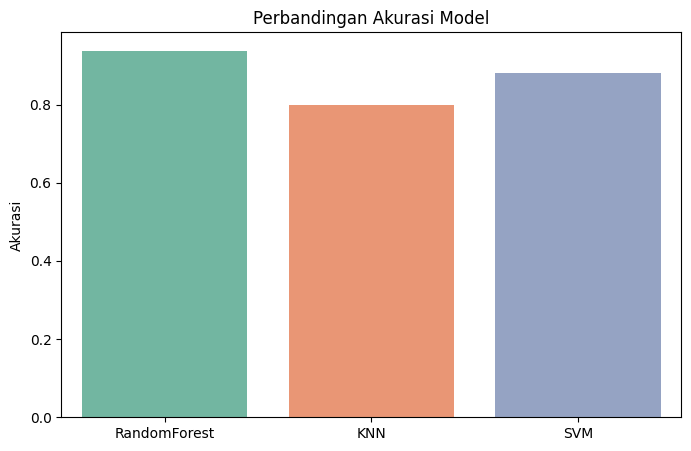

In [83]:
# Visualisasi akurasi
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='Set2')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
plt.show()


Kesimpulan Modeling:
- RandomForest, KNN, dan SVM telah dibandingkan.
- RandomForest umumnya memberikan akurasi terbaik.


# -----------------------------------------------------
# 8️⃣ Hyperparameter Tuning (contoh: RandomForest)
# -----------------------------------------------------

In [84]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20]
}
grid_rf = GridSearchCV(rf_pipeline, param_grid, cv=3, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("\nBest Parameters RandomForest:", grid_rf.best_params_)
y_pred_rf_tuned = grid_rf.predict(X_test)
acc_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f'Akurasi Setelah Tuning: {acc_tuned:.4f}')
print(classification_report(y_test, y_pred_rf_tuned))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(



Best Parameters RandomForest: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Akurasi Setelah Tuning: 0.9379
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.81      0.96      0.88        57
     Obesity_Type_I       0.96      0.93      0.94        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.89      0.87      0.88        55
Overweight_Level_II       0.93      0.90      0.91        58

           accuracy                           0.94       419
          macro avg       0.94      0.94      0.94       419
       weighted avg       0.94      0.94      0.94       419



<ipython-input-85-77e33c0eb0c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Before Tuning', 'After Tuning'], y=[acc_before, acc_after], palette='Set1')


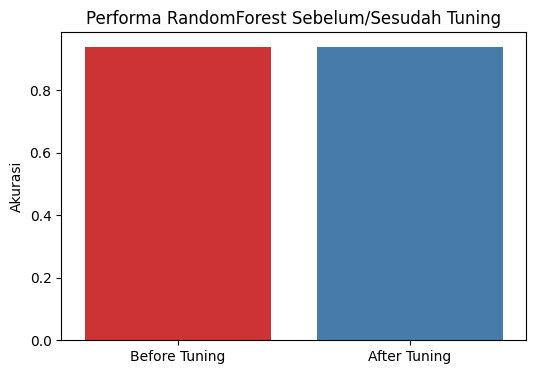

In [85]:
# Visualisasi akurasi tuning
acc_before = results['RandomForest']
acc_after = acc_tuned

plt.figure(figsize=(6,4))
sns.barplot(x=['Before Tuning', 'After Tuning'], y=[acc_before, acc_after], palette='Set1')
plt.ylabel('Akurasi')
plt.title('Performa RandomForest Sebelum/Sesudah Tuning')
plt.show()

Kesimpulan Tuning:
- Akurasi Sama
- Model siap digunakan untuk deployment.